In [48]:
import torch
import random

In [49]:
data = torch.linspace(1, 20, 20)
data = torch.unsqueeze(data, dim=1)
data = torch.cat((data, data * 3 + 2), dim=1)
data -= data.mean(dim=0)
print(data)

tensor([[ -9.5000, -28.5000],
        [ -8.5000, -25.5000],
        [ -7.5000, -22.5000],
        [ -6.5000, -19.5000],
        [ -5.5000, -16.5000],
        [ -4.5000, -13.5000],
        [ -3.5000, -10.5000],
        [ -2.5000,  -7.5000],
        [ -1.5000,  -4.5000],
        [ -0.5000,  -1.5000],
        [  0.5000,   1.5000],
        [  1.5000,   4.5000],
        [  2.5000,   7.5000],
        [  3.5000,  10.5000],
        [  4.5000,  13.5000],
        [  5.5000,  16.5000],
        [  6.5000,  19.5000],
        [  7.5000,  22.5000],
        [  8.5000,  25.5000],
        [  9.5000,  28.5000]])


In [50]:
covariance_matirx = data.transpose(0, 1).matmul(data)
u,s,v = torch.svd(covariance_matirx)
new_data = u.transpose(0,1)[0].matmul(data.transpose(0,1)).unsqueeze(dim=1)
print(new_data)

tensor([[ 30.0416],
        [ 26.8794],
        [ 23.7171],
        [ 20.5548],
        [ 17.3925],
        [ 14.2302],
        [ 11.0680],
        [  7.9057],
        [  4.7434],
        [  1.5811],
        [ -1.5811],
        [ -4.7434],
        [ -7.9057],
        [-11.0680],
        [-14.2302],
        [-17.3925],
        [-20.5548],
        [-23.7171],
        [-26.8794],
        [-30.0416]])


In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
new_data = pca.fit_transform(data.numpy())
print(new_data)

[[ 30.04165  ]
 [ 26.879364 ]
 [ 23.717087 ]
 [ 20.554806 ]
 [ 17.39253  ]
 [ 14.230251 ]
 [ 11.067973 ]
 [  7.905695 ]
 [  4.7434173]
 [  1.5811392]
 [ -1.5811392]
 [ -4.7434173]
 [ -7.905695 ]
 [-11.067973 ]
 [-14.230251 ]
 [-17.39253  ]
 [-20.554806 ]
 [-23.717087 ]
 [-26.879364 ]
 [-30.041641 ]]


# 如何选择k

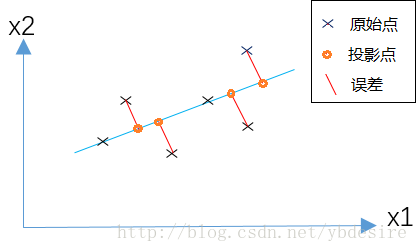

选择一个$k$的初始值，$k=1$

计算$u_{reduce},z^1,z^2,...,z^m,x^1_{approx},...,x^m_{approx}$

其中$u$为svd计算后得出的第一个方阵，$z$为降维后的数据，$x_{approx}$为投影点

判断$\frac{\frac{1}{m}\sum_{i=1}^m||x^i-x_{approx}^i||^2}{\frac{1}{m}\sum_{i=1}^m||x^i||^2} \le 0.01$，否则递增$k$后重新计算

$[u,s,v]=svd(\Sigma)$

其中$s$为对角阵，对角线元素表示为：$s_{11},s_{22},...,s_{nn}$

公式可以简化为：$\frac{\frac{1}{m}\sum_{i=1}^m||x^i-x_{approx}^i||^2}{\frac{1}{m}\sum_{i=1}^m||x^i||^2} = 1 - \frac{\sum_{i=1}^ks_{ii}}{\sum_{i=1}^ks_{nn}}$